In [1]:
import numpy as np
import xarray as xray
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from pop_gradient import agg_and_gradient
reload(agg_and_gradient)

<module 'pop_gradient.agg_and_gradient' from 'pop_gradient/agg_and_gradient.py'>

In [8]:
basedir = '/data/scratch/takaya/POP_data/Surface_Daily/'

In [15]:
fname = os.path.join(basedir, 
                                    'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-01-01.nc')
ds = xray.open_dataset(fname,
                      decode_times=False)
mask = ds.KMT > 1
lat = ds.TLAT.where(mask)
lon = ds.TLONG.where(mask)

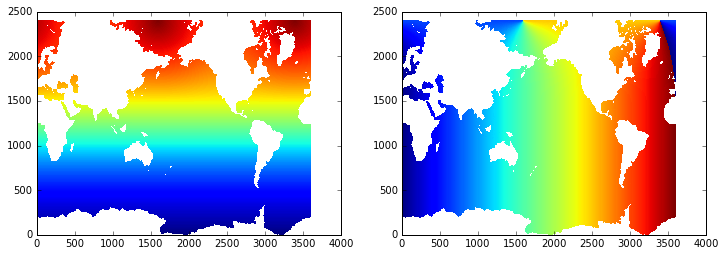

In [26]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.pcolormesh(np.ma.masked_invalid(lat.roll(nlon=-1100).values))
ax2 = fig.add_subplot(122)
ax2.pcolormesh(np.ma.masked_invalid(lon.roll(nlon=-1100).values))

In [48]:
p = agg_and_gradient.POPFile(fname)

In [13]:
p.initialize_gradient_operator()

pop_gradient/agg_and_gradient.py:105: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  self._ahf[self.mask] = 0.


In [23]:
print lat.roll(nlon=-1080).values.ravel()

[         nan          nan          nan ...,  82.58150235  82.54020015
  82.49890661]


In [33]:
lat_interp = p.interpolate_2d(np.ma.masked_invalid(lat.roll(nlon=-1100).values))
lon_interp = p.interpolate_2d(np.ma.masked_invalid(lon.roll(nlon=-1100).values))

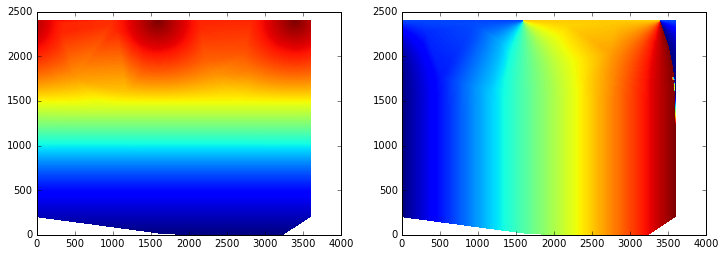

In [34]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.pcolormesh(np.ma.masked_invalid(lat_interp))
ax2 = fig.add_subplot(122)
ax2.pcolormesh(np.ma.masked_invalid(lon_interp))

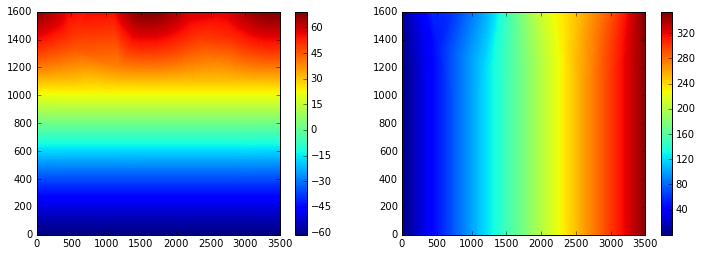

In [39]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
cax1 = ax1.pcolormesh(np.ma.masked_invalid(lat_interp[400:2000, :3500]))
cbar = fig.colorbar(cax1)
ax2 = fig.add_subplot(122)
cax2 = ax2.pcolormesh(np.ma.masked_invalid(lon_interp[400:2000, :3500]))
cbar = fig.colorbar(cax2)

In [ ]:
ys, ye = (400, 2000)
xs, xe = (0, 3500)
SST1deg = p.aggregate_latlon(lat_interp[ys:ye, :xe], lon_interp[ys:ye, :xe]-180., latbound=60., lonbound=170.)